#**PyTorch VIII**
Autor: Jheremy Reyes,

estudiante de matemáticas,

Universidad El Bosque

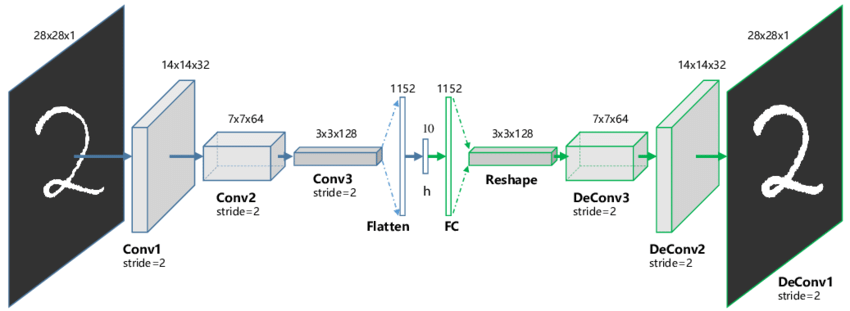

**Introducción práctica a los Autoencoders con PyTorch**

**Comprendiendo los Autoencoders con PyTorch**

n el vasto universo del aprendizaje automático, los autoencoders ocupan un lugar especial. Estas redes neuronales profundas no están diseñadas directamente para clasificar, predecir o tomar decisiones, sino para aprender representaciones eficientes de los datos. Son modelos de compresión y reconstrucción que aprenden a reproducir su entrada en la salida, pero pasando la información por un "cuello de botella", una capa de baja dimensión que obliga a la red a codificar las características más relevantes de los datos.

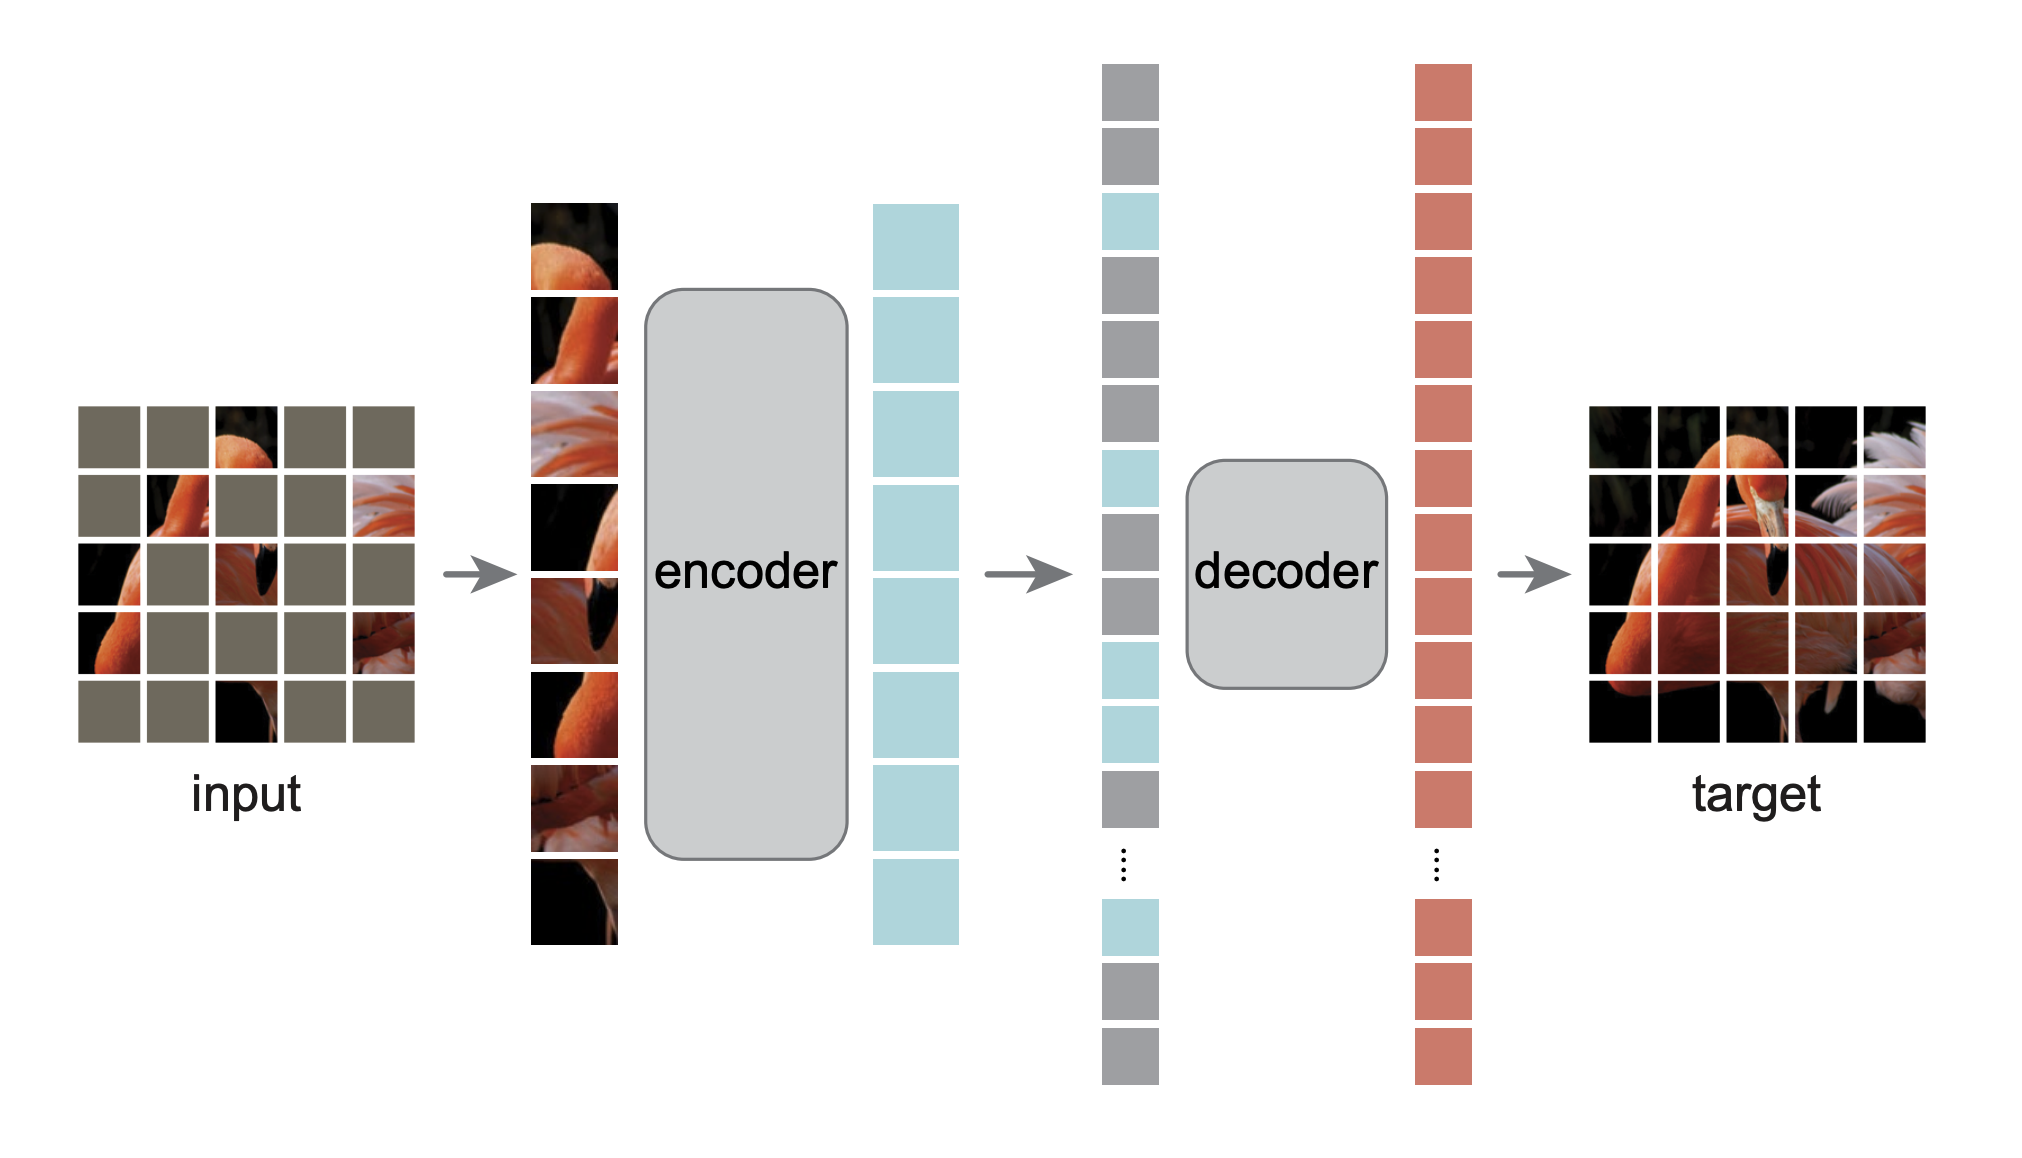

**¿Qué es un Autoencoder?**


Un autoencoder es una red neuronal que consta de dos partes principales:

Encoder (codificador): Transforma la entrada de alta dimensión en una representación más compacta o latente.
Decoder (decodificador): Reconstruye la entrada original a partir de esta representación comprimida.

**¿Por qué son útiles?**

Los autoencoders se usan en una variedad de tareas en las que se requiere entender, comprimir o generar datos:

Reducción de dimensionalidad (como alternativa no lineal a PCA)
Eliminación de ruido en imágenes y señales
Inicialización de redes profundas
Generación de datos sintéticos
Detección de anomalías (por ejemplo, si un autoencoder reconstruye mal una entrada, puede que esa entrada sea atípica)

**Breve historia**

El concepto de autoencoder fue introducido en la década de 1980, pero cobró verdadera relevancia en la última década gracias al auge del deep learning. Inicialmente, se utilizaban como una técnica de preentrenamiento para redes profundas. Con el tiempo, sus variantes —como los Denoising Autoencoders, los Sparse Autoencoders y los Variational Autoencoders (VAEs)— ampliaron su utilidad a campos como la generación de imágenes, el procesamiento de lenguaje natural y más.

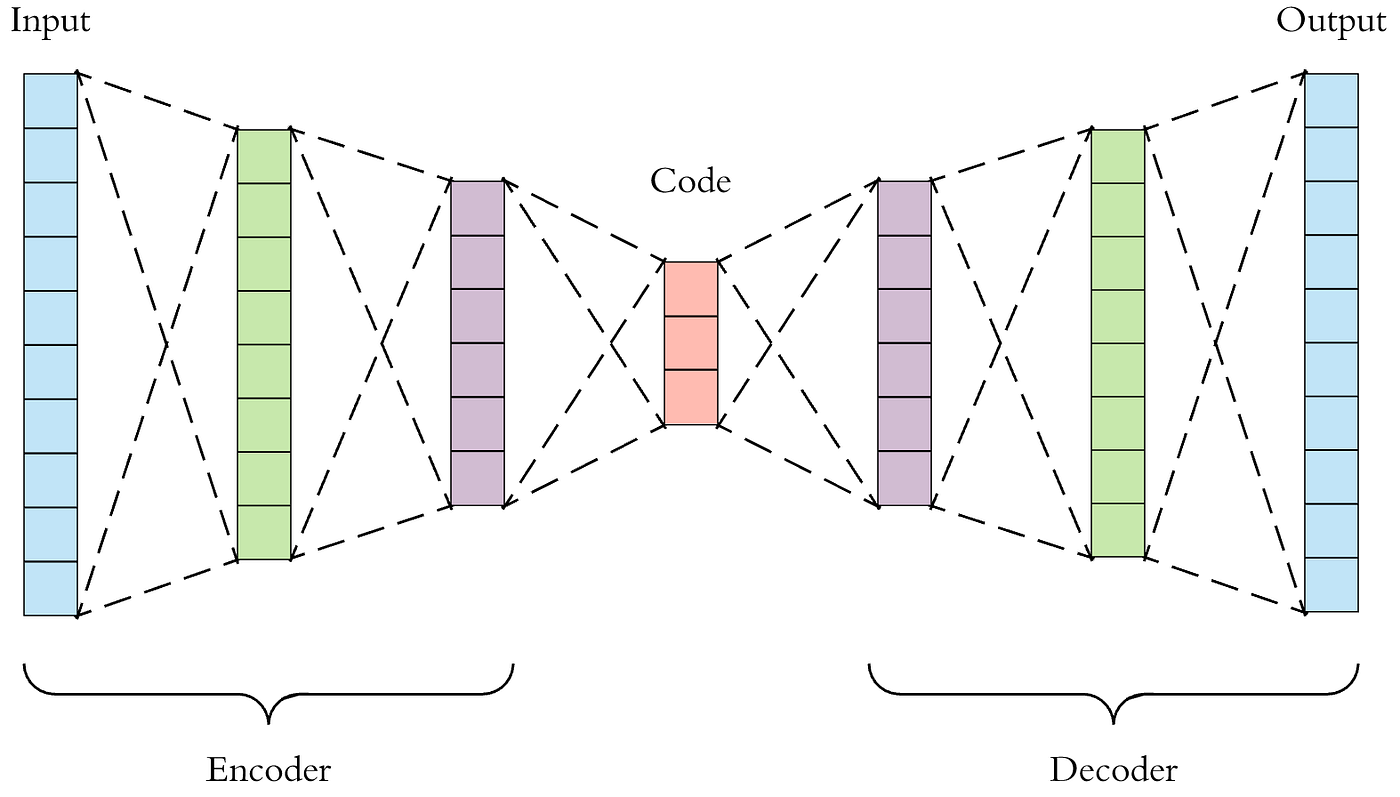

**Instalación y configuración del entorno**

Antes de comenzar a desarrollar cualquier modelo en PyTorch, es fundamental asegurarnos de que el entorno de trabajo esté correctamente configurado. Esto incluye instalar las bibliotecas necesarias como torch, torchvision (para acceder fácilmente a datasets como MNIST), y matplotlib para la visualización. Si trabajamos en un entorno como Google Colab, estas bibliotecas ya suelen estar preinstaladas, pero siempre es buena práctica confirmar su disponibilidad.

Además, es muy importante configurar el uso del hardware. Si disponemos de una GPU, el entrenamiento será mucho más rápido. PyTorch nos permite detectar fácilmente si hay una GPU disponible con torch.cuda.is_available() y así mover el modelo y los datos a ese dispositivo. Esta pequeña verificación puede marcar una gran diferencia en tiempos de entrenamiento.

In [ ]:
!pip install torch torchvision matplotlib --quiet

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Configurar uso de GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
Usando dispositivo: cpu


**Preparación de los datos**

En este proyecto, trabajaremos con MNIST, un conjunto de datos clásico compuesto por imágenes en escala de grises de dígitos manuscritos del 0 al 9. Cada imagen tiene una resolución de 28x28 píxeles.

Usamos torchvision.datasets para descargar MNIST directamente desde internet, y aplicamos una transformación simple: convertir cada imagen en un tensor. Este paso es necesario porque los modelos de PyTorch solo entienden tensores como entradas.

Dividimos el dataset en conjunto de entrenamiento y prueba, y utilizamos DataLoader para cargar los datos en pequeños lotes (batches). Esto permite que el modelo se entrene en fragmentos de los datos, lo que es más eficiente en términos de memoria y computación.

In [ ]:
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 53.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.89MB/s]


**Definición del modelo Autoencoder**

El corazón del notebook es el modelo de autoencoder, que definimos como una subclase de torch.nn.Module. En este caso, implementamos una arquitectura completamente conectada (fully connected), lo que significa que cada neurona en una capa está conectada a todas las neuronas de la siguiente capa.

El autoencoder se divide en dos partes:

Encoder (codificador): Reduce gradualmente la dimensión de la entrada (de 784 a 3 dimensiones en este ejemplo). El objetivo del encoder es extraer las características más importantes de la imagen.
Decoder (decodificador): Intenta reconstruir la imagen original a partir de esta representación comprimida. La salida final se pasa por una función Sigmoid para asegurar que los valores estén en el rango [0, 1], como los píxeles originales.
Este tipo de arquitectura obliga al modelo a aprender una representación eficiente de los datos.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # Bottleneck
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder().to(device)

**Función de pérdida y optimizador**
Para saber si el autoencoder está haciendo bien su trabajo, necesitamos una función de pérdida que cuantifique el error entre la imagen original y la reconstruida. Usamos el error cuadrático medio (MSELoss), que penaliza las diferencias píxel a píxel.

El modelo aprende ajustando sus pesos con base en este error. Para hacer este ajuste, usamos un optimizador. En este caso, elegimos Adam, un algoritmo de optimización muy popular que combina lo mejor de otros métodos como el descenso por gradiente estocástico y el momentum.

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

**Entrenamiento del modelo**

El entrenamiento del autoencoder se realiza en ciclos llamados épocas. En cada época, el modelo pasa por todos los ejemplos del conjunto de entrenamiento.

En cada lote:

El modelo recibe imágenes de entrada.
Las pasa por el encoder y luego por el decoder.
Calcula la pérdida con respecto a la imagen original.
Retropropaga el error para ajustar los pesos.
Actualiza los parámetros del modelo usando el optimizador.
Este proceso se repite por múltiples épocas, permitiendo al modelo mejorar progresivamente su capacidad de reconstrucción.

Al final de cada época, registramos la pérdida promedio, lo cual nos ayuda a visualizar si el modelo está aprendiendo o si necesita ajustes.

Epoch 1/20, Loss: 0.0695
Epoch 2/20, Loss: 0.0507
Epoch 3/20, Loss: 0.0449
Epoch 4/20, Loss: 0.0420
Epoch 5/20, Loss: 0.0404
Epoch 6/20, Loss: 0.0394
Epoch 7/20, Loss: 0.0386
Epoch 8/20, Loss: 0.0380
Epoch 9/20, Loss: 0.0375
Epoch 10/20, Loss: 0.0371
Epoch 11/20, Loss: 0.0367
Epoch 12/20, Loss: 0.0364
Epoch 13/20, Loss: 0.0361
Epoch 14/20, Loss: 0.0358
Epoch 15/20, Loss: 0.0356
Epoch 16/20, Loss: 0.0354
Epoch 17/20, Loss: 0.0352
Epoch 18/20, Loss: 0.0350
Epoch 19/20, Loss: 0.0348
Epoch 20/20, Loss: 0.0347


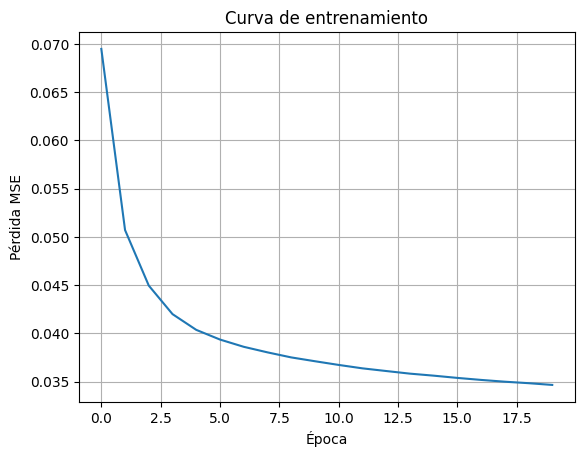

In [ ]:
n_epochs = 20
train_losses = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for data in train_loader:
        imgs, _ = data
        imgs = imgs.to(device)

        # Forward
        outputs = model(imgs)
        loss = criterion(outputs, imgs.view(imgs.size(0), -1))

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.4f}")

# Visualización de la pérdida
plt.plot(train_losses)
plt.xlabel("Época")
plt.ylabel("Pérdida MSE")
plt.title("Curva de entrenamiento")
plt.grid(True)
plt.show()

**Visualización de resultados**

Después del entrenamiento, queremos ver qué tan bien el autoencoder ha aprendido a reconstruir las imágenes. Para ello, tomamos un lote de imágenes del conjunto de prueba y lo pasamos por el modelo.

Mostramos dos filas de imágenes:

La primera contiene las imágenes originales.
La segunda, las imágenes reconstruidas por el autoencoder.
Esta comparación visual es fundamental porque nos permite evaluar de forma intuitiva qué tan bien el modelo ha capturado las características importantes de los datos. Si la reconstrucción se parece mucho a la original, significa que el modelo ha aprendido representaciones útiles en el espacio latente.

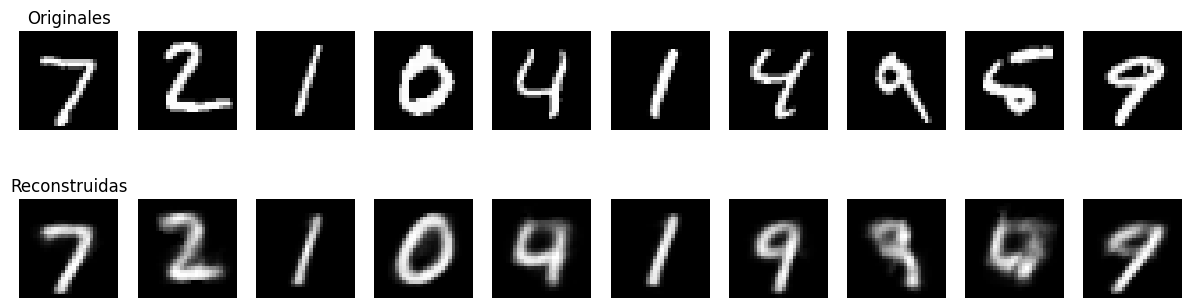

In [ ]:
# Mostrar imágenes originales y reconstruidas
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
outputs = model(images)

# Visualizar
images = images.cpu().detach().numpy()
outputs = outputs.cpu().detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))
for i in range(10):
    axes[0, i].imshow(images[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(outputs[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.show()
